# Tutorial 3: Chapter 2

## Goals:

The goals for the this lab are to use real data to explore important concepts in Chapter 2 of Wooldridge using real
data. In this lab we will explore concepts related to:


• Estimates and Estimators with ordinary lease squares

• Sampling Distribution

• Residuals and Fitted Values

## Basics

1. Always include your import statements. Remember that you can add to the import statements at any time,
 as long as you rerun your code after. As always, copy and pasting what is inside these notebooks will
 suffice.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import Image

For this lab we will be using the data from the National Longitudinal Survey - J. R. Kling (2001) “Interpreting
Instrumental Variables Estimates of the Return to Schooling,” Journal of Business and Economic Statistics,
19, 358-364. This dataset contains a random sample of data on wages, education, location as well as many
control variables. There are two files associated with this dataset: “Data66.dat” and “Data66.dct”.

I complied them in Stata into Tutorial3.dta it is in the github repo

2. Lets take a look at the data. 

In [4]:
df = pd.read_stata("C:/Users/patri/Desktop/Metrics TA/Intro-To-Econometrics-In-Python/Datasets/Tutorial3.dta")
df

,id,black,imigrnt,hhead,mag_14,news_14,lib_14,num_sib,fgrade,mgrade,...,intmo66,nlsflt,nsib,ns1,ns2,ns3,ns4,ns5,ns6,ns7
0,1.0,1.0,0.0,5.0,1.0,1.0,1.0,1.0,NaN,11.0,...,11.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,0.0,1.0,0.0,1.0,0.0,7.0,NaN,NaN,...,11.0,1.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,8.0,8.0,...,11.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,14.0,12.0,...,11.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,11.0,12.0,...,11.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221,5222.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,6.0,8.0,...,11.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5222,5223.0,1.0,0.0,1.0,1.0,0.0,0.0,9.0,3.0,2.0,...,11.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5223,5224.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,6.0,...,11.0,1.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5224,5225.0,1.0,0.0,6.0,0.0,0.0,0.0,6.0,NaN,NaN,...,11.0,1.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Note that there are so many columns that we cannot see all of the column names when we preview. We can change our default
preivews by adding

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


Or you can just print all the column names

In [5]:
for col in df.columns:
    print(col)

id
black
imigrnt
hhead
mag_14
news_14
lib_14
num_sib
fgrade
mgrade
iq
bdate
gfill76
wt76
grade76
grade66
age66
smsa66
region
smsa76
col4
mcol4
col4pub
south76
wage76
exp76
expsq76
age76
agesq76
reg1
reg2
reg3
reg4
reg5
reg6
reg7
reg8
reg9
momdad14
sinmom14
nodaded
nomomed
daded
momed
famed
famed1
famed2
famed3
famed4
famed5
famed6
famed7
famed8
famed9
int76
age1415
age1617
age1819
age2021
age2224
cage1415
cage1617
cage1819
cage2021
cage2224
cage66
a1
a2
a3
a4
a5
a6
a7
a8
a9
a10
a11
ca1
ca2
ca3
ca4
ca5
ca6
ca7
ca8
ca9
ca10
ca11
ca12
g25
g25i
intmo66
nlsflt
nsib
ns1
ns2
ns3
ns4
ns5
ns6
ns7


3. Often times datasets are missing information, or you want to concentrate on a sample of individuals where
information is available for all variables you are interested in. In these cases it is necessary to “clean” the
dataset to get it ready for analysis. You’ll want to “drop” observations that are missing key variables, or
simply “keep” the observations that have all the information needed. Lets drop observations which have
missing values for education, wage or who were not at the first interview.

    There are many ways to do this, including built in functions

    First to access a column and delete rows based on a conditional we can use

In [6]:
# overwrite the df into a new df with the same name
# In the new df, we only have instances where nlsflt is not 0
df = df[df.nlsflt != 0]


We can also use built in functions.

df.dropna will drop any none types

In [7]:
df = df.dropna(subset=['grade76','wage76','nlsflt'])


## Estimates, Estimators, and Hypothesis Testing

1. We are interested in the relationship between(hourly) wages (wage76) and years of education (grade76). Lets
first calculate the summary statistics of these two variables using the .describe function we learned from a prior lab.

In [8]:
#\n prints on a new line
print("wages:\n",df['wage76'].describe(), '\n')

print("grades:\n",df['grade76'].describe())

wages:
 count    3010.000000
mean        1.656664
std         0.443798
min         0.000000
25%         1.371825
50%         1.681750
75%         1.958350
max         3.179700
Name: wage76, dtype: float64 

grades:
 count    3010.000000
mean       13.263455
std         2.676913
min         1.000000
25%        12.000000
50%        13.000000
75%        16.000000
max        18.000000
Name: grade76, dtype: float64


Looking at these statistics we see that there are 3010 observations left in our sample after dropping the observations above. The average person in our sample has 13 years of education, with the largest value being 18, and perhaps surprisingly a person in our sample reports having just one year of education. Turning to wages we see that average earning in our sample is approx. $\$1.65$ an hour, with the highest hourly wage being over $\$3.17$, and the lowest reporting receiving $\$0$ an hour.


2. To get an initial understanding of the relationship between wages and education we can calculate the
correlation as well as the covariance between these two variables

In [9]:
#As we learned in the first tutorial:
df['wage76'].corr(df['grade76'])

0.31422552838961576

In [10]:
df['wage76'].cov(df['grade76'])

0.37330262484722054

A positive correlation between these two variables would indicate that wages are high when education levels
are high (and vice versa). A positive covariance implies that when years of education is above the mean then
wages are above the mean (and vice versa). Remember, this does not imply causation, it simply gives us an
idea about the relationship between levels of education and wage levels.


3. To get a visual understanding of the relationship between the two variables, create a scatterplot where
“wage76” is on the Y-axis and “grade76” is on the X-axis. Refer to the first tutorial if you need a refresher on
how to create a scatter plot. The plot will look like this:

Each of the dots on the scatter plot represents one of the observation in our dataset. OLS uses a an intercept, $\widehat{β}_{0}$, and slope, $\widehat{β}_{1}$, to minimized the sum of the (squared) distance between each of the dots and this regression line. To get an idea of this relationship, we can add a linear prediction to this scatter plot.

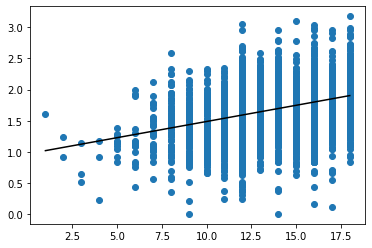

In [11]:
#As before create the graph
plt.scatter( df['grade76'], df['wage76'])

#This is creating a line of best fit.
plt.plot( np.unique(df['grade76']), np.poly1d(np.polyfit(df['grade76'], df['wage76'], 1)) (np.unique(df['grade76'])), 'k')

plt.show()

A quick explaination of the line of best fit code:

The plot function takes in many different parameters. The first two will always be your x and y values np.unique(df['grade76']) means that our x's are all of the unique grade76 values

The y values are created in this way:

np.poly1d(np.polyfit(df['grade76'], df['wage76'], 1))(np.unique(df['grade76'])

Polyfit creates a least squares polynomial fit of the x and y values. The 1 is the degree of polynomial we are using.

Poly1d is creating a 1d polynomial. So given 1, 2, 3 it would act as 1x^2 + 2x + 3

You don't need to worry too much about how the code works since you can just copy and paste.


4. Next, lets run a regression to get an estimate of the relationship between schooling and wages.
We’ll use “wage76” as our dependent variable (“Y ”), and “grade76” as our independent variable (“$X_{1}$”) to
estimate the intercept, $\widehat{β}_{0}$
, and slope $\widehat{β}_{1}$ parameters.

I am using the OLS from statsmodel.api since it has a very verbose summary built in. You obviously can use
any other regression like from sklearn.linear_model import LinearRegression, but you may need to define a function
to get all of the outputs you need.

In [12]:
# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X = sm.add_constant(df['grade76'].ravel())
results = sm.OLS(df['wage76'], X).fit()
print(results.summary())





                            OLS Regression Results                            
Dep. Variable:                 wage76   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     329.5
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           5.76e-70
Time:                        12:48:33   Log-Likelihood:                -1668.8
No. Observations:                3010   AIC:                             3342.
Df Residuals:                    3008   BIC:                             3354.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9657      0.039     24.871      0.0

Now lets look at the stata output for the same regression and talk about our results.

![](Images/tut3reg.PNG)

The coefficient on “grade76” ($\widehat{β}_{1}$) indicates that another year of education is predicted to cause hourly wage to increase by $.05.

The coefficient for the constant ($\widehat{β}_{0}$) shows the the predicted wage for someone with 0 years of education is approx. $0.97 per hour.

While we probably think that the constant is not that useful in this application, remember that there were
individuals in our sample with only one year of education.

Keep in mind, we are unlikely getting the
causal effect of a year on education as there are probably many other factors that are correlation with
education that also influence hourly wages.

The next column gives us the standard error of the parameters $\widehat{β}_{0}$ and $\widehat{β}_{1}$. This allows us to understand the sampling distribution of our OLS estimators, and will be extensively used going forward for
hypothesis testing.
The r-squared indicates that we are explaining just under 10% of the variation in hourly wages in 1976
with years of education.

Remember R2 = ESS/TSS = 1 − (SSR/TSS). We can individually see the calculation of
ESS, SSR, SST in the top left panel of the stata results. We can see that ESS = 58.5, SSE = 534.1, SST = 592.6.

We do not have this in our python output. But we can very easily get them using built in methods.

If you need to find the full list of built ins for regression results with the OLS in stats model go to:

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html

In [14]:
print("ESS: ", results.ess)
print("SSR: ", results.ssr)
print("SST: ", results.centered_tss)

ESS:  58.516157978935325
SSR:  534.1264577956593
SST:  592.6426157745947


5. Perhaps we think that a better way to think about the relationship between education and wages is that an
increase in education causes wages to change by a certain %, rather than constant amount. To estimate this
relationship, we should first generate a variable equal the the natural log of wages.

The logical thing to do would be

In [15]:
# Note that in np, log is the natural log, and log10 is base 10
df['lnwage'] = np.log(df.wage76)

c:\users\patri\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


But this gives us an error since we are trying to do ln(0)

Stata automatically drops values of 0 when doing the ln calculations. We specifically need to drop the values.

So you need to be very careful in your assignments when you are dropping 0's, incase you need to recalculate after.

I would recommend doing a deep copy of the df and using that copy for any problem where you are dropping 0's.

In [16]:
# So we need to drop the 0's
df = df[df.wage76 != 0]
# Then create ln wage
df['lnwage'] = np.log(df.wage76)

6. Now we can estimate a regression with the natural log of hourly wages as our dependent variable and years
of education as our independent variable. Follow the steps above, but use “lnwage” as as the dependent
variable. We get the following results:

In [17]:
newX = sm.add_constant(df['grade76'].ravel())
results = sm.OLS(df['lnwage'], newX).fit()
print(results.summary())
print('==' * 40)
print("ESS: ", results.ess, " SSR: ", results.ssr, " SST: ", results.centered_tss)


                            OLS Regression Results                            
Dep. Variable:                 lnwage   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     288.9
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           6.17e-62
Time:                        12:48:33   Log-Likelihood:                -624.04
No. Observations:                3008   AIC:                             1252.
Df Residuals:                    3006   BIC:                             1264.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0055      0.027      0.201      0.8

Now the results indicate that a one-year increase in schooling is associated with an approx. 3.4% increase
in hourly wages. Notice that the change in the functional form of the dependent variable also changes the
r-squared - we are explaining approx. 8.7% of the variation in the natural log of hourly wages with years of
education.


7. Lastly we need to construct the residuals (the OLS errors), fitted values, and other information
from your (last) regression.

We can use the .resid and .fittedvalues from the stats model api which are methods built into the results of our regression.

In [18]:
results.resid


1       0.284318
2       0.032102
3       0.261402
4      -0.472338
5       0.266955
          ...   
5217   -0.229626
5218   -0.002390
5219    0.056442
5220    0.255717
5224    0.051821
Length: 3008, dtype: float64

In [19]:
results.fittedvalues


1       0.246957
2       0.419419
3       0.419419
4       0.384927
5       0.419419
          ...   
5217    0.419419
5218    0.453912
5219    0.419419
5220    0.419419
5224    0.453912
Length: 3008, dtype: float64